# Pre Entrega # 10
## Proyecto Data Science
##### Data Science - 32845
### José María Reyes Retana Tamayo
### Profesor: David Bustos Usta
### Tutor: Anahí García

## Resumen (Abstract):

El siguiente estudio se centra en el análisis de un conjunto de 3197 marcas de cervezas de 934 compañías productoras de cerveza que han sido evaluadas por usuarios a través de cuestionarios en línea, así mismo, se cuenta con la información reportada por las productoras sobre sus bebidas. Las cervezas son locales y son solamente de EEUU, del mismo modo, las evaluaciones son emitidas únicamente por consumidores de dicho país, por lo que este estudio no debe considerarse como válido para cualquier región fuera de los EEUU y más bien será tratado como una muestra pequeña dentro del universo cervecero pero que puede orientar a los lectores en cuanto a las tendencias y gustos vigentes.

La intención de este estudio ha sido la de comparar la información presentada por los productores de cerveza y comparar estos valores con las evaluaciones de los usuarios con la intención de encontrar que variables son las que más afectan a que una cerveza obtenga buenos resultados en el mercado de cervezas artesanales de los EEUU. Para lo anterior, se han realizado primero una indagación de los datos de forma gráfica a modo de análisis exploratorio de la información y obtención preliminar de resultados. Siguiente, se realizaron los cálculos matemáticos estadíticos para obtener valores de desviación estándar de las variables analizadas, coeficientes de correlación (donde así se propuso), prueba de hipótesis mediante el llamado "p valor", entre otros.

Las principales variables analizadas para este estudio han sido las relacionadas con el sabor de la cerveza: amargor y alcohol; y se han comparado con la evaluación que los consumidores han dado en las clasificaciones de: Aroma, Apariencia, Sensación en el Paladar, Sabor y Evaluación General.

A través de esta investigación, se ha observado que la calificación que un usuario da a cierta cerveza va estrechamente relacionada con la calificación que dará a la cerveza como conjunto; sin embargo, resulta difícil predecir cuál será la calificación de sabor de una cerveza.

## Índice:
1. Contexto del Estudio.\
    1.1 Contexto Comercial.\
    1.2 Contexto Analítico.
2. Conjunto de Datos.
3. Definición de las variables.
4. Análisis descriptivo de la información (EDA).
5. Objetivo del proyecto.\
    5.1 Metodología propuesta.
6. Hipótesis del proyecto.\
    6.1 Metodología de evaluación de las hipótesis.
7. Obtención de información.\
    7.1 Exploración de las variables de amargor.\
    7.2 Exploración de las variables de alcohol.\
    7.3 Exploración de las variables de calificación.
8. Modelo de clasificación.\
    8.1 Selección de atributos (Feature Selection).\
    8.2 Creación y calibración del modelo de ML.\
    8.3 Prueba del modelo.\
    8.4 Métricas del modelo.
9. Modelo de regresión.\
    9.1 Selección de atributos (Feature Selection).\
    9.2 Creación y calibración del modelo de ML.\
    9.3 Prueba del modelo.\
    9.4 Métricas del modelo.
10. Conclusiones.\
    10.1 Conclusiones sobre las hipótesis.\
    10.2 Conclusiones sobre los modelos de ML.\
    10.3 Pensamientos finales.

## 1. Contexto del Estudio:

### 1.1 Contexto Comercial:

La industria de la cerveza es una de las pocas que pueden considerarse milenarias, el consumo de esta bebida está tan ligado a la humanidad como el pan mismo, siendo que prácticamente se dieron a la par. Sin embargo, si bien la bebida lleva ya milenios, literalmente, de consumo, sus estilos, presentaciones y hasta la forma y lugar donde se bebe han cambiado radicalmente, especialmente desde la invención de la refrigeración que ha permitido la exportación de estilos locales a todo el mundo y ha abierto el mercado de una forma sin precendente en la industria.

Por lo anterior, cada vez más, las distintas variedades de cerveza encuentran sus nichos de consumidores y se crean nuevos "sub-mercados" en los que la competencia ya no es contra todas las variedades, si no contra las de características similares por ser así de segmentados los gustos de los consumidores.

De acuerdo a lo ya mencionado, es importante que antes de comenzar con la producción con una nueva línea de cerveza, vale la pena comprender el nicho del mercado al que se quiere atender.

### 1.2 Contexto Analítico:

Se ha conseguido una base de datos que contiene más de tres mil marcas de cerveza diferentes, todas ellas de producción local (no en masa) en los Estados Unidos de América (EEUU).

La información no viene filtrada y se deberán realizar ajustes a las columnas y cálculos previos para poder mejorar la entendibilidad de los datos.

Se utilizarán procesos estadísticos para agrupar la información y para establecer patrones.

## 2. Conjunto de Datos:

Se ha elegido trabajar con el data set nombrado "Beer Profiles and Ratings", obtenido de Kaggle en:
###### https://www.kaggle.com/code/aeryan/spotify-music-analysis/data

Creamos la base de datos a partir de un archivo CSV y la copiamos a un Data Frame (de Pandas) de trabajo, el cual modificaremos indiscriminadamente sin correr riesgo de alterar la información original.

In [1]:
# Importación de librerías iniciales:
import pandas as pd
import numpy as np

# Ubicación del archivo CSV dentro de el Codespace:
data_set_csv = "/workspaces/Coderhouse/Proyecto/Data/Raw/Beer Profiles and Ratings.csv"

# Creación del Data Frame:
data_set = pd.read_csv(data_set_csv)

print(type(data_set))
data_set.head()

<class 'pandas.core.frame.DataFrame'>


,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


Descripción del Data Frame donde se presenta la información con la que trabajaremos:

In [2]:
print(f"Forma del Data Frame: {data_set.shape}")
print(f"Número de dimensiones del Data Frame: {data_set.ndim}")
print(f"Cantidad de datos del Data Frame: {data_set.size}")
print(f"Nombre de las columnas del Data Frame: {data_set.columns}")

Forma del Data Frame: (3197, 25)
Número de dimensiones del Data Frame: 2
Cantidad de datos del Data Frame: 79925
Nombre de las columnas del Data Frame: Index(['Name', 'Style', 'Brewery', 'Beer Name (Full)', 'Description', 'ABV',
       'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')


In [3]:
# Se presentan el número de datos nulos en cada columna.
data_set.isnull().sum()

Name                 0
Style                0
Brewery              0
Beer Name (Full)     0
Description          0
ABV                  0
Min IBU              0
Max IBU              0
Astringency          0
Body                 0
Alcohol              0
Bitter               0
Sweet                0
Sour                 0
Salty                0
Fruits               0
Hoppy                0
Spices               0
Malty                0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
review_overall       0
number_of_reviews    0
dtype: int64

Como podemos observar, no contamos con datos nulos en nuestra información y se tienen 3,197 entradas, cada una representando una cerveza diferente, misma que se ve descrita en 25 columnas en las que se especifican sus características.

In [4]:
# Método .info() para presentar la cantidad y el tipo de datos.
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

En la anterior tabla, podemos ver que la mayoría de nuestras variables son numéricas cuantitativas, lo cual nos permitirá trabajar más facilmente con modelos de Machine Learning sin necesidad de aplicar procesos de codificación de variables o etiquetado.

## 3. Definición de las variables:

Este data set contiene 25 columnas, las cuales se describen a continuación.

* Name: nombre de la cerveza, como se presenta en la etiqueta.

* Style: estilo de la cerveza.

* Brewery: nombre de la compañía cervecera que produce.

* Beer Name (Full): identificador único para cada cerveza, presenta nombre de la cerveza y la cervecera.

* Description: descripción de la cerveza de acuerdo al productor, no disponible para todas las cervezas presentadas.

* ABV: contenido de alcohol (% por volumen).
###### “International Bitterness Unit”, es la unidad utilizada para cuantificar que tan amarga es una cerveza. Los valores se presentan en un intervalo de 0 a 100, donde 0 es nada amargo y valores cercanos a 100 representan un alto grado de amargura.
* Min IBU: en esta columna se presentan los valores mínimos esperados de amargura.

* Max IBU: en esta columna se presentan los valores máximos esperados de amargura.
###### Las siguientes columnas presentan una calificación arbitraria otorgada por el autor del documento, que para este estudio se simplificará solo al valor numérico. Para cada uno de los aspectos evaluados por los consumidores. Entre mayor es la calificación, significa que dicha característica es más remarcable o evidente en la bebida.
* Astringency: astringencia.

* Body: cuerpo, que tan “densa” se siente en la boca.

* Alcohol: sensación de alcohol. No confundir con los grados de alcohol que es una medida objetiva, esta es la sensación que los consumidores tuvieron.

* Bitter: amargor. No confundir con los grados IBU que es una medida objetiva, esta es la sensación que los consumidores tuvieron.

* Sweet: dulzor.

* Sour: sabor ácido.

* Fruits: sabor afrutado.

* Hoppy: sabor a lúpulo.

* Spices: sabor a especias.

* Malty: sabor a malta (de cebada, trigo o cualquiera que sea el cereal con el que se elaboró la cerveza).
###### Las últimas seis columnas presentan la calificación general que los consumidores otorgaron a los distintos aspectos de la cerveza y el promedio general. Las calificaciones van del 0 al 5, puesto que la información fue obtenida de un portal donde se evaluaba mediante estrellas, siendo 5 el máximo valor posible.
* review _ aroma: evaluación del aroma (percepción olfativa) de la cerveza.

* review _ appearance: evaluación de la apariencia (percepción visual) de la cerveza.

* review _ palate: evaluación de la sensación en el paladar.

* review _ taste: evaluación del sabor (percepción del gusto) de la cerveza.

* review _ overall: evaluación global de la cerveza.
* number _ of _ reviews: total de evaluaciones recibidas.

## 4. Análisis descriptivo de la información (EDA):

In [5]:
# Importamos las librerías a utilizar:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Características para nuestros gráficos.
mpl.rcParams['axes.titleweight'] = 'heavy'

# Creamos el data frame de trabajo para evitar perder información:
wrk_df = data_set.copy()

print(type(wrk_df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
for col in wrk_df.columns:
    if wrk_df[col].dtype == 'object':
        valores_unicos = wrk_df[col].nunique()
        print(f"Columna {col} tiene {valores_unicos} valores únicos.")

Columna Name tiene 3066 valores únicos.
Columna Style tiene 111 valores únicos.
Columna Brewery tiene 934 valores únicos.
Columna Beer Name (Full) tiene 3197 valores únicos.
Columna Description tiene 1841 valores únicos.


Puesto que ya hemos dado un vistazo a las distintas columnas y la forma en que los datos vienen presentados en el data frame original, se proponen algunos cambios a las columnas para poder procesar mejor la información.

Los cambios a realizar serán:
* Renombrar la columna Beer Name (Full) para hacerla más manejable.\
* Crear una columna con el valor promedio de la graduación IBU de las cervezas.\
    ** Se reporta un valor máximo y un valor mínimo de grados IBU en esta base de datos puesto que se trata de cervezas artesanales que aún son suceptibles a diferencias entre lote y lote.
* En base a investigación realizada para la mejor comprensión de los datos, se encuentra que un estándar en la industria cervecera es que una graduación de más de 35 grados IBU se considera una cerveza muy amarga y menor graduación que eso se considera poco amarga.\
* En base a investigación realizada para la mejor comprensión de los datos, se encuentra que un estándar en la industria cervecera es que una graduación de más de 6 grados de alcohol ABV se considera Alto y menos es lo normal.\
* Se separó la columna Style en dos, el principal y el secundario, ya que haciendo una revisión de esa columna se tenían demasiados estilos muy segmentados que dificultarían el modelo de clasificación.

In [7]:
# Renombramos la columna "Beer Name (Full)" para evitar errores de código:
wrk_df.rename(columns = {'Beer Name (Full)' : 'Full_name'}, inplace = True)

# Obtenemos un array con el promedio de IBU de cada cerveza.
prom_IBU = pd.DataFrame((wrk_df[["Min IBU", "Max IBU"]].mean(axis = 1)), columns = ['IBU_Promedio'])

# Agregamos la columna IBU Promedio a nuestra copia del Data Set.
wrk_df = pd.concat([wrk_df,prom_IBU], axis = 1)

# Creamos una columna que identique las cervezas si tienen más o menos de 35 Grados IBU:
wrk_df['amargor'] = np.where(wrk_df['IBU_Promedio'] > 35, 'Muy amarga', 'Poco Amarga')

# Separando la columna Style
wrk_df[["Style", "Secondary Style"]] = wrk_df.Style.str.split(" - ", expand = True)

# Creamos una columna que identique las cervezas si tienen más o menos de 6° de alcohol:
wrk_df['nivel_alcohol'] = np.where(wrk_df['ABV'] >= 6, 'Alto', 'Normal')

In [8]:
for col in wrk_df.columns:
    if wrk_df[col].dtype == 'object':
        valores_unicos = wrk_df[col].nunique()
        print(f"Columna {col} tiene {valores_unicos} valores únicos.")

Columna Name tiene 3066 valores únicos.
Columna Style tiene 43 valores únicos.
Columna Brewery tiene 934 valores únicos.
Columna Full_name tiene 3197 valores únicos.
Columna Description tiene 1841 valores únicos.
Columna amargor tiene 2 valores únicos.
Columna Secondary Style tiene 63 valores únicos.
Columna nivel_alcohol tiene 2 valores únicos.


Vemos como pasamos de 111 estilos distintos a solo 43, así como la clasificación en dos categorías para el IBU y el nivel de alcohol, esto nos permitirá obtener mejor la información.

Para facilitar la exploración de cada una de las variables, trabajaremos con gráficas.

In [9]:
# Creamos un DF para variables cualitativas y otro para cuantitativas:
cual = []
cuan = []

for col in wrk_df.columns:
    if wrk_df[col].dtype == "object":
        cual.append(col)
    else:
        cuan.append(col)

cual_df = wrk_df[cual]
cuan_df = wrk_df[cuan]

print(f"Variables cualitativas: {cual}")
print(f"Variables cuantitativas: {cuan}")

Variables cualitativas: ['Name', 'Style', 'Brewery', 'Full_name', 'Description', 'amargor', 'Secondary Style', 'nivel_alcohol']
Variables cuantitativas: ['ABV', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall', 'number_of_reviews', 'IBU_Promedio']


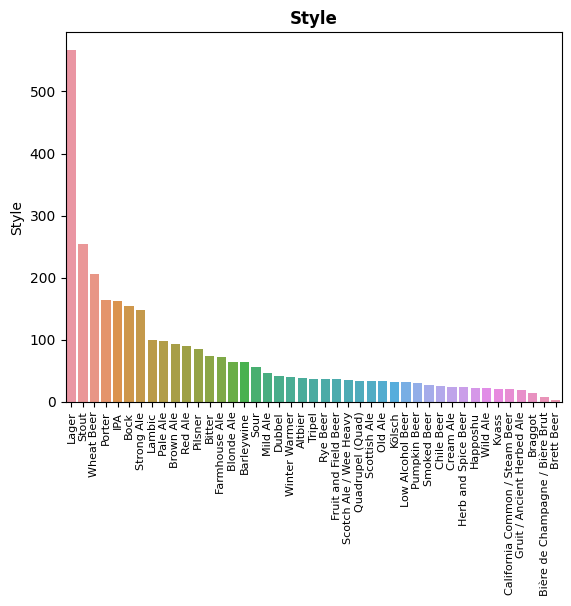

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


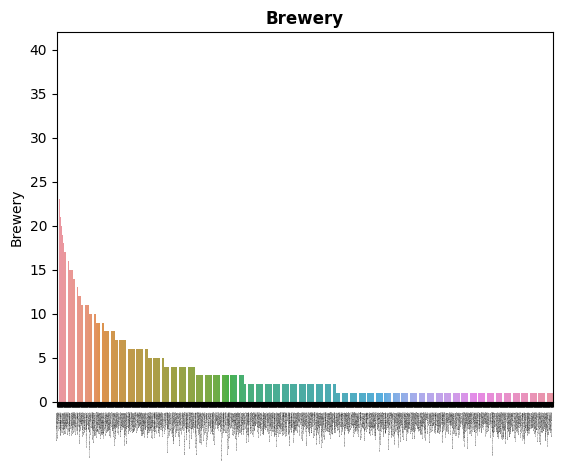

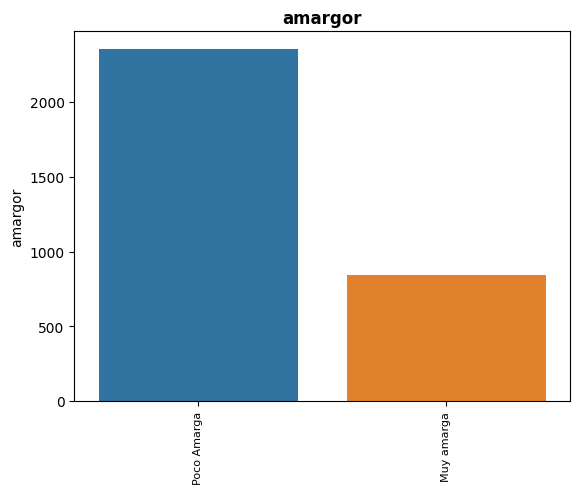

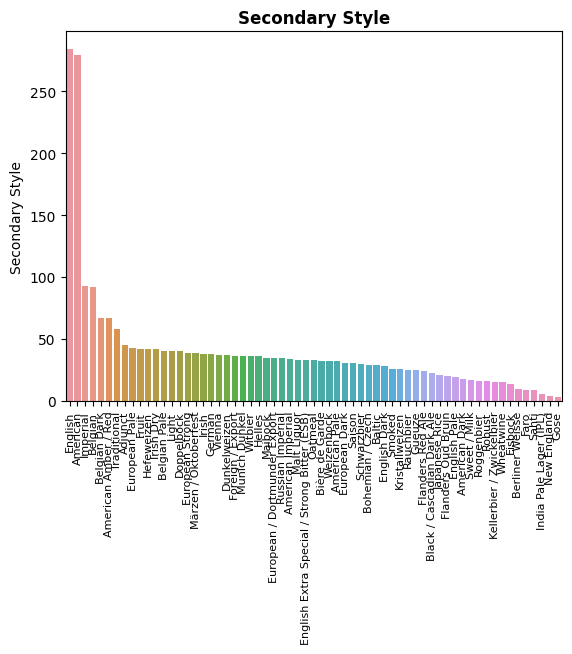

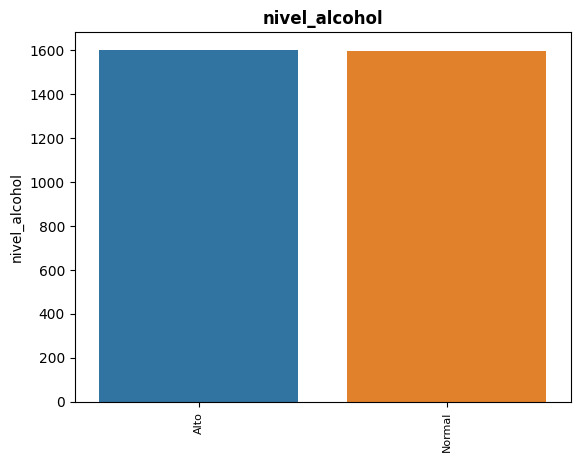

In [10]:
# Realizamos gráficos de barras para cada una de las variables cualitativas:
# Columnas que no interesan:
no_graf = ["Name", "Full_name", "Description"]
# Se hace un gráfico por cada columna:
for col in cual_df.columns:
    if col not in no_graf:
        conteo = cual_df[col].value_counts()
        sns.barplot(x=conteo.index, y=conteo)
        plt.title(col)
        if col == "Brewery":
            plt.xticks(rotation=90, fontsize = .5)

        else:
            plt.xticks(rotation=90, fontsize = 8)

        # Mostrar el gráfico:
        plt.show()

In [11]:
# Guardamos unas listas que servirán más adelante:
top5_pop = ['Lager', 'Stout', 'Wheat Beer', 'Porter', 'IPA']
bot5_pop = ['Brett Beer','Bière de Champagne / Bière Brut', 'Braggot', 'Gruit / Ancient Herbed Ale', 'California Common / Steam Beer' ]

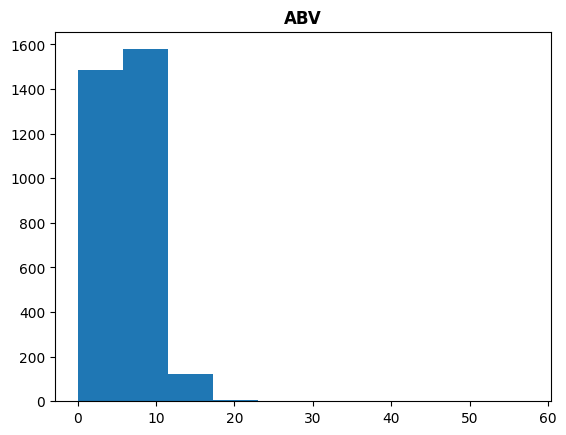

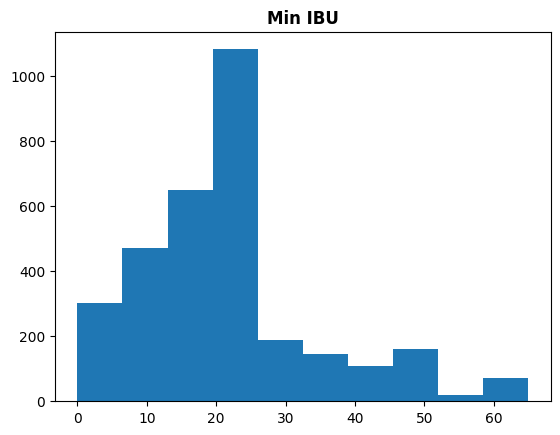

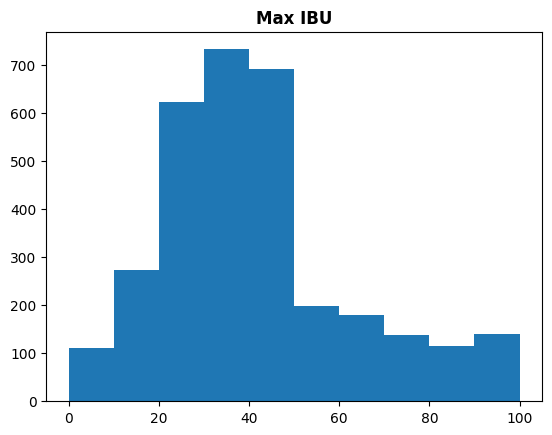

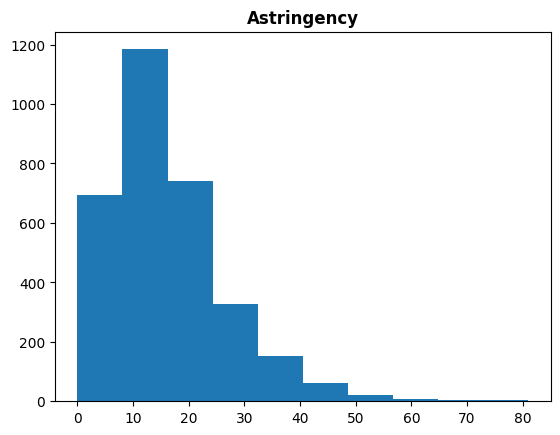

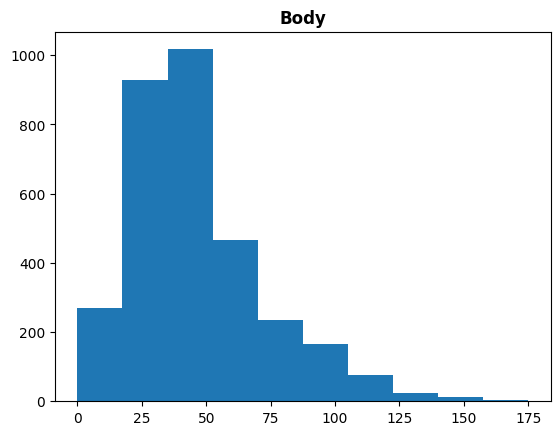

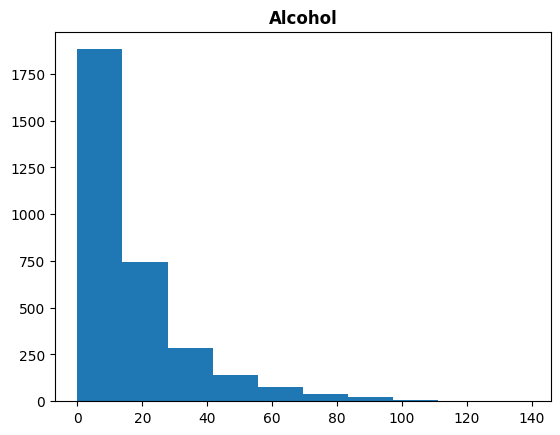

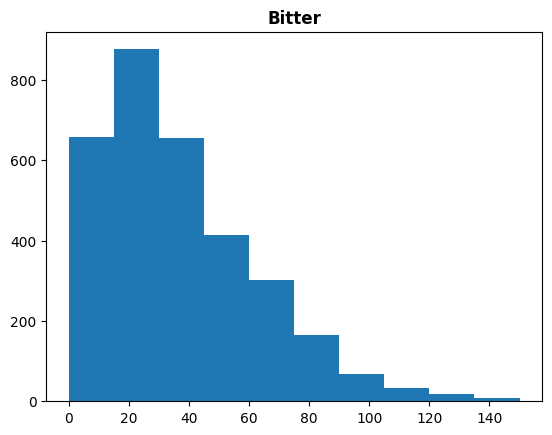

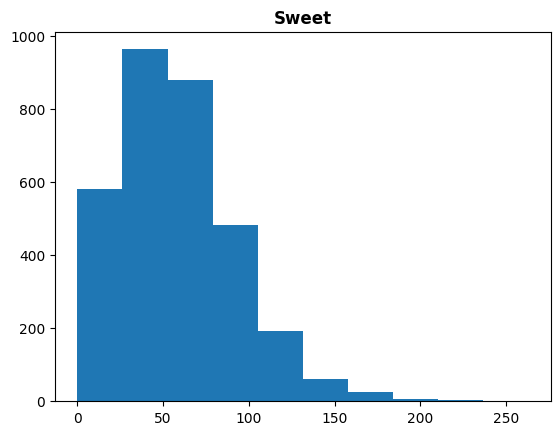

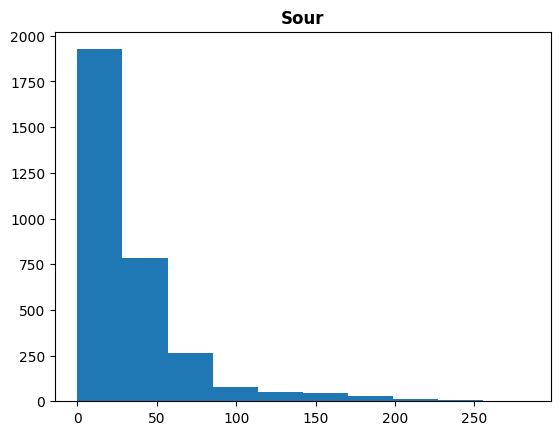

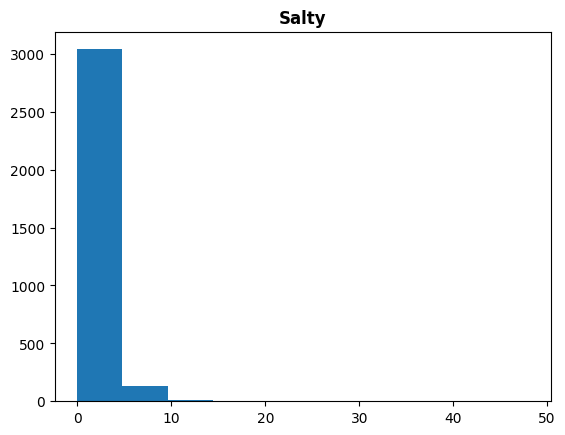

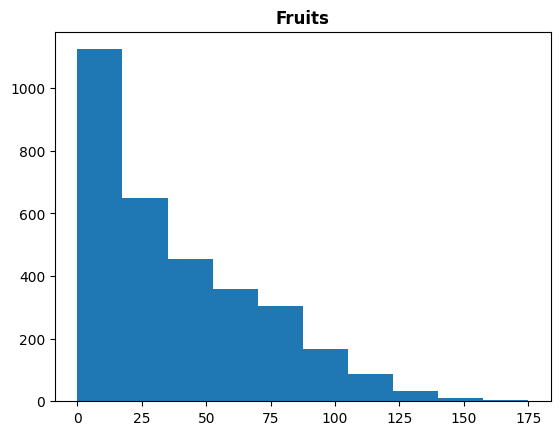

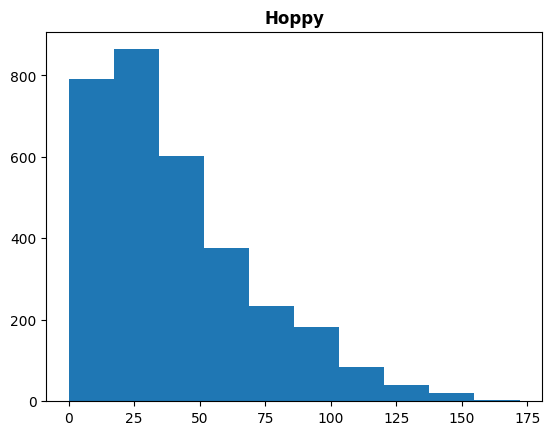

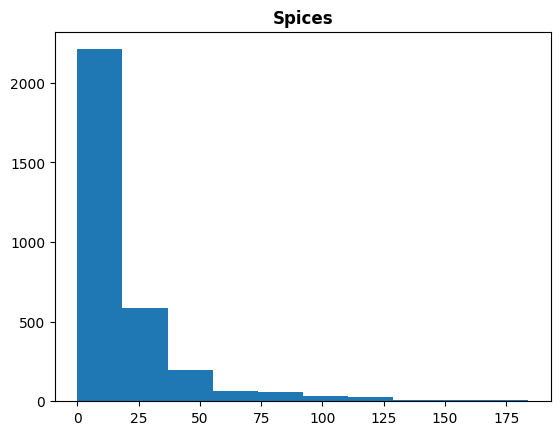

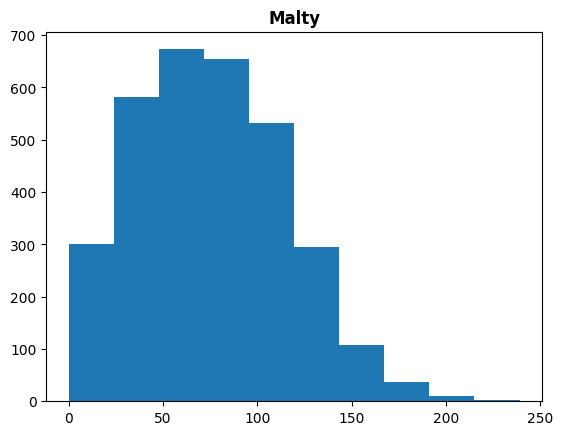

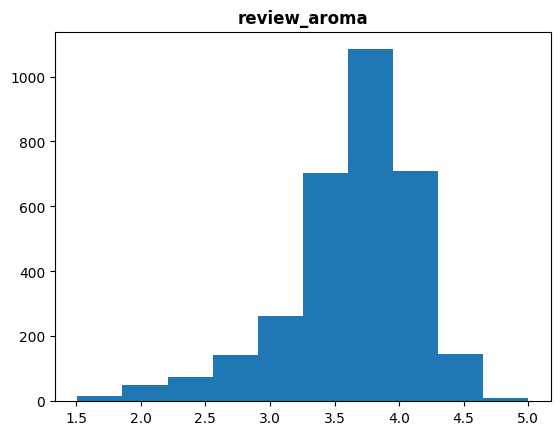

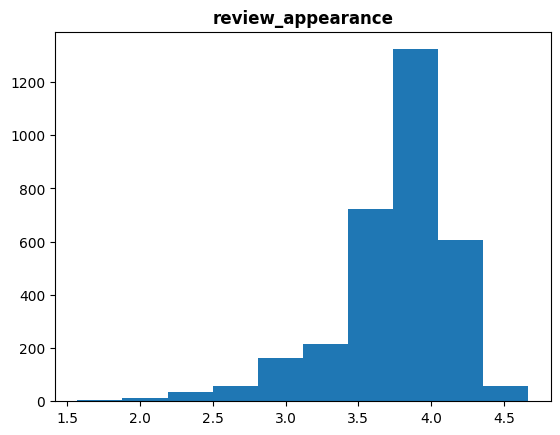

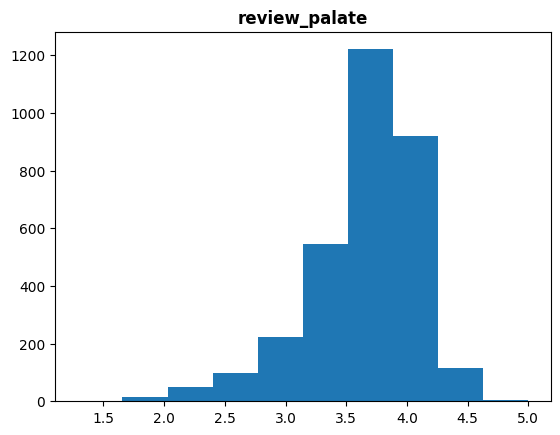

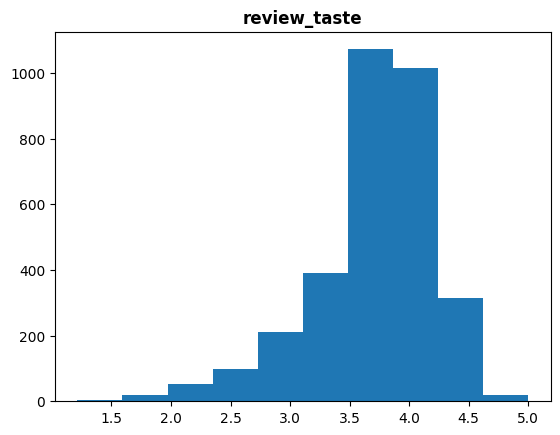

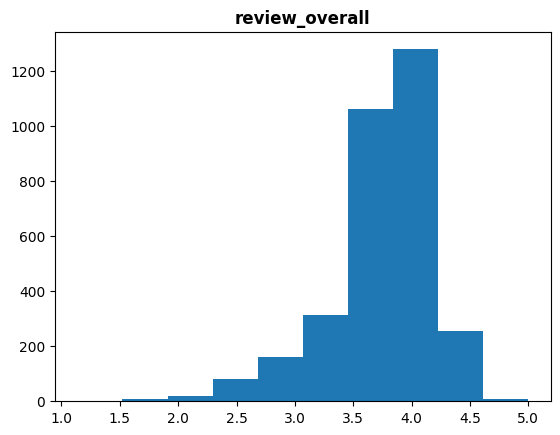

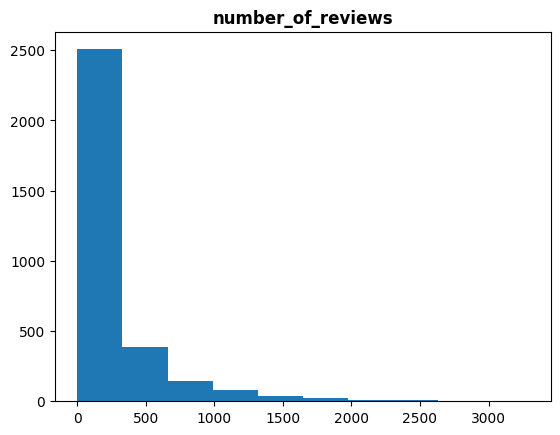

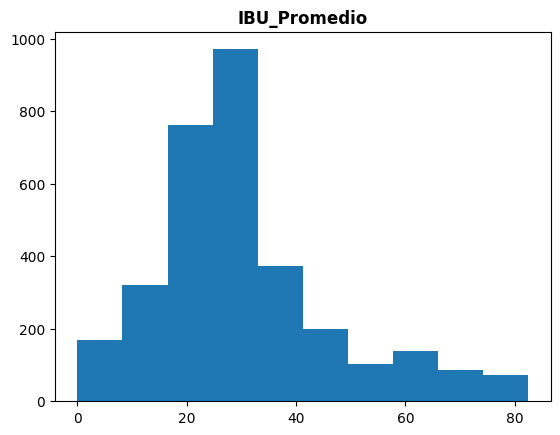

In [12]:
# Ahora un gráfico de histograma para cada variables cuantitativa:
# Se hace un gráfico por cada columna:
for col in cuan_df.columns:
    plt.hist(cuan_df[col])
    plt.title(col)
    plt.show()

    # Mostrar el gráfico:
    plt.show()

A través de los gráficos anteriores podemos observar lo siguiente:
* Los estilos más producidos son:\
    1. Lager - 2. Stout - 3. Wheat beer - 4. Porter - 5. IPA
* Los estilos menos producidos son:\
    1. Brett beer - 2. Biere Brut - 3. Braggot - 4. Ancient herbed ale - 5. Steam beer
* Hay aproximadamente el doble de cervezas "poco amargas" que "muy amargas".
* Hay aproximadamente el mismo número de cervezas con nivel "Alto" que con nivel "Normal" de alcohol.\
    ** Si solo se ve la gráfica de los grados ABV, puede resultar engañoso a primera vista, pero esta solo nos muestra que son muy pocas las cervezas que rebasan los 10° ABV.
* El gráfico de IBU promedio nos permite observar mejor la distribución de esta variable que si observamos por separado los gráficos de los valores máximo y mínimo. Podemos ver que hay una distribución un poco cargada a la izquierda, es decir, mayor tendencia a una menor graduación IBU.
* Las calificaciones otorgadas por los encuestados sobre los componentes de sabor, olor y sensación muestran distribuciones muy cargadas hacia la derecha, especialmente aquellas de Salty y Spices.
* Las calificaciones otorgadas en una escala del 1 al 5, muestran una tendencia ligeramente cargada hacia la izquierda, mostrando que las calificaciones suelen ser favorables a las bebidas. Importante observar que muchas cervezas cuentan con 250 o menos calificaciones.

In [13]:
# Calculamos el valor promedio de los Grados IBU y ABV y de calificaciones por cerveza.
Prom_IBU = wrk_df["IBU_Promedio"].mean()
Prom_ABV = wrk_df["ABV"].mean()
prom_no_calif = wrk_df["number_of_reviews"].mean()

print(f"El valor promedio de graduación IBU en la muestra es de: {Prom_IBU : .2f}°.")
print(f"El valor promedio de graduación IBU en la muestra es de: {Prom_ABV : .2f}°.")
print(f"Cada cerveza fue calificada {prom_no_calif : .0f} veces en promedio.")

El valor promedio de graduación IBU en la muestra es de:  30.08°.
El valor promedio de graduación IBU en la muestra es de:  6.53°.
Cada cerveza fue calificada  233 veces en promedio.


Ya que tenemos algunas variables que son muy similares en concepto (ej: amargar v. IBU promedio, alcohol v. ABV, las reseñas de palate y taste, entre otras) y sabemos que variables con altos valores de correlación pueden afectar a los modelos de ML, se presenta la correlación entre nuestras variables cuantitativas.

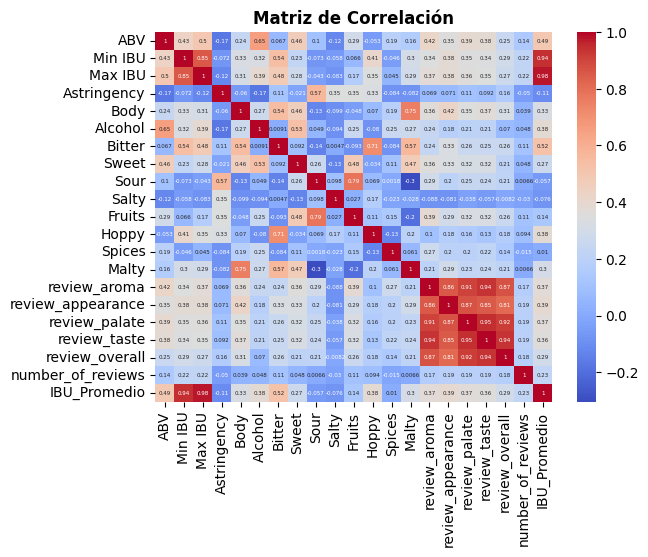

In [14]:
# Creamos la matriz de correlación:
matriz_corr = cuan_df.corr()

# Graficamos la matriz para mejorar la lectura de la información:
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', annot_kws={"size":4})
plt.title('Matriz de Correlación')

# Se muestra el gráfico:
plt.show()

Observamos que existe una correlación importante entre las variables de las "reviews", por lo cual sería recomendable quitar algunas para evitar redundancia, así mismo, lo ya esperado, el IBU Promedio tiene una fuerte correlación con los valores máximo y mínimo de IBU.

## 5. Objetivo del proyecto:

Para este proyecto se plantean tres objetivos a cumplirse:
* Comprender mejor la información obtenida.
* Encontrar las variables que más correlación tienen con la calificación global otorgada a una cerveza.
* Poder predecir las características y variedad que producirían una cerveza muy bien calificada.

### 5.1 Metodología propuesta:

Para lograr lo anterior, se plantearán algunas hipótesis que sirvan de guía en la exploración y comprensión de los datos obtenidos, enfocándose principalmente en como se comparan las sensaciones que reportan los consumidores con las variables de ABV e IBU que reportan los productores.

Por otro lado, se formarán dos modelos de machine learning, uno de regresión y otro de clasificación. El primero para poder obtener la calificación global que se esperaría de una cerveza dados ciertos factores, el segundo para identificar la variedad de una cerveza dados ciertos factores.

Para ambos casos, esos factores o atributos se seleccionarán independientemente siendo los que más peso tengan sobre nuestra variable objetivo.

## 6. Hipótesis del proyecto:

De acuerdo con los objetivos planteados, el trabajo se centrará en 3 variables principalmente, estas son los grados IBU, los grados ABV y la calificación global que cada cerveza a obtenido. Se han elegido estas variables puesto que se trata de variables que pueden ser medidas objetivamente y están claramente definidas (IBUs y ABV) y una calificación general fácil de interpretar, en contraposición de calificaciones más abstractas como calificación al paladar o de olor, en las que muchos de los encuestados pudieran haber dado puntajes más bien relacionados con otras cosas.

Se plantean 2 hipótesis a validar durante la investigación:

**1)** Las cervezas que tengan una mayor graduación de IBUs o de alcohol (ABV) recibirán menores calificaciones por tratarse de productos más de nicho.\
**2)** Las variables que midan los grados IBU serán las que mayor correlación guarden con la calificación general otorgada a cada cerveza.

### 6.1 Metodología de evaluación de las hipótesis:

Para poder evaluar nuestras hipótesis planteadas, debemos tener una gran comprensión de los conceptos presentes, es por eso que primero definiremos lo que miden los grados IBU y como se relacionan con los componentes de la cerveza.

Los grados IBU de una cerveza representan el amargor que esta pueda tener en su sabor y van directamente relacionados a la aportación de lúpulo (hops en inglés) durante el proceso de elaboración de la bebida. Así mismo, el lúpulo otorga sabores más intensos que se pueden clasificar principalmente como afrutados y ácidos.

Para encontrar si existe una correlación entre los IBUs y otras variables, se analizará a mayor detalle la matriz de correlación previamente obtenida.

De acuerdo con el portal "https://www.beersandtrips.com/" podemos clasificar las cervezas de acuerdo a sus grados IBU como:
* De 5 a 20 IBU Poco amarga.
* De 21 a 35 IBU Amarga.
* De 36 a 50 IBU Bastante amarga.
* Más de 50 IBU Muy amarga.
* Más de 100 IBU Solo apta para fans del amargor extra.

Por lo anterior, para fines de este estudio, consideraremos "*grados IBU más elevados*" como todos aquellos superiores a 35, ya que, de acuerdo a la clasificación, una graduación de más de 35 grados ya es considerada como "Bastante Amarga", "Muy Amarga" o superior, de aquí es donde se podrá dar sentido al hecho de que la graduación IBU pueda ser la que mayor correlación tenga con la calificación global.

Similar a lo que se hará para los IBUs, se realizará un análisis de correlaciones con la variable ABV para poder determinar que influencia tiene esta sobre las demás y si a mayor graduación, las calificaciones globales bajan como se ha presupuesto.

## 7. Obtención de información:

En esta sección del proyecto, se dará un vistazo a mayor profundidad sobre las variables de más interés en el estudio que son las relacionadas al amargor de la bebida, a los grados de alcohol y a la calificación global.

### 7.1 Exploración de las variables de amargor:

Puesto que una de las variables que más interesan a este estudio es la de los grados IBU, se procede con el siguiente análisis del valor promedio de IBU por tipo de cerveza.

/tmp/ipykernel_1503/4115227356.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(IBU_Prom_Est.index, fontsize = 8, rotation = 90)


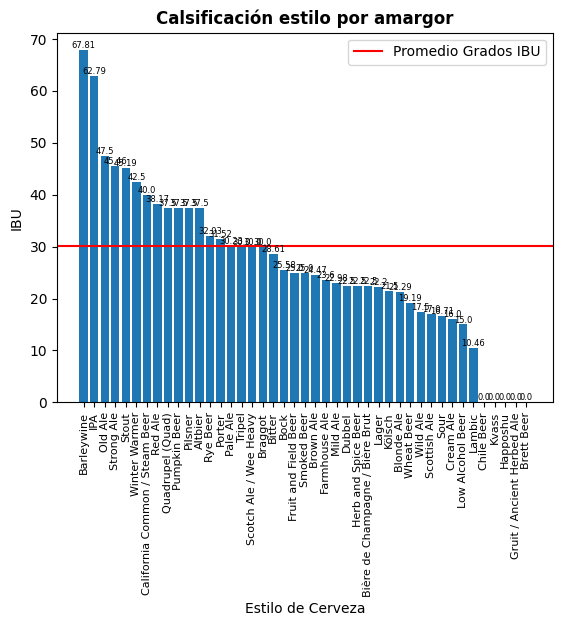

In [15]:
# Se hace un gráfico de barras:
# Calculamos el valor promedio de IBU por estilo de cerveza y lo ordenamos de manera descendente:
IBU_Prom_Est = wrk_df.groupby('Style')['IBU_Promedio'].mean()
IBU_Prom_Est = IBU_Prom_Est.sort_values(ascending=False)

# Creamos la figura:
IBU1, ax = plt.subplots()

# Graficamos las barras:
barras = ax.bar(IBU_Prom_Est.index, IBU_Prom_Est.values)

# Agregamos el valor a cada barra:
for barra in barras:
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, height,
            round(height, 2), ha='center', va='bottom', fontsize=6)

# Agregamos la línea de Promedio de grados IBU:
ax.axhline(Prom_IBU, color='red', label='Promedio Grados IBU')

# Identiicamos el eje X:
ax.set_xlabel('Estilo de Cerveza')

# Modificamos las etiquetas del eje X:
ax.set_xticklabels(IBU_Prom_Est.index, fontsize = 8, rotation = 90)

# Identiicamos el eje Y:
ax.set_ylabel('IBU')

# Ponemos el título:
ax.set_title('Calsificación estilo por amargor')

# Agregamos la leyenda:
ax.legend()

# Se muestra el gráfico:
plt.show()

In [16]:
# Guardamos Top 5 y Bottom 5 con más IBU en listas:
top5_IBU = ['Barleywine', 'IPA', 'Old Ale', 'Strong Ale', 'Stout']
bot5_IBU= ['Lambic', 'Low Alcohol Beer', 'Cream Ale', 'Sour', 'Scottish Ale']
sin_IBU = ['Chile Beer', 'Kvass', 'Happoshu', 'Gruit / Ancient Herbed Ale', 'Brett Beer']

Vemos que las cervezas con mayor graduación IBU son:
1. Barleywine: 67.81°.
2. IPA: 62.79°.
3. Old Ale: 47.50°.
4. Strong Ale: 45.46°.
5. Stout: 45.19°.

Exceptuando las que tienen 0 graduación IBU que, de acuerdo a investigación son cervezas muy poco comunes y con procesos muy elaborados que las vuelven poco comerciales, las cervezas con menor graduación IBU son:
1. Lambic: 10.46°.
2. Low Alcohol Beer: 15.00°.
3. Cream Ale: 16.00°.
4. Sour: 16.71°.
5. Scottish Ale: 17.00°.

Con lo anterior y, de nuevo apoyándonos en investigación adicional, podemos ver que la nuestra muestra tiene cervezas con más IBUs de lo que normalmente se encuentra en el mercado.

In [17]:
# Conteo de cantidad de cervezas de 0 grados IBU:
var_cero_IBU = {}

for index, row in wrk_df.iterrows():
    if row['IBU_Promedio'] == 0:
        if row['Style'] in var_cero_IBU:
            var_cero_IBU[row['Style']] += 1
        else:
            var_cero_IBU[row['Style']] = 1

total= 0
for elem in var_cero_IBU:
    print(f"{elem} = {var_cero_IBU[elem]}")
    total += var_cero_IBU[elem]
print(f"Total con 0 IBUs = {total}")

Brett Beer = 3
Chile Beer = 25
Farmhouse Ale = 9
Gruit / Ancient Herbed Ale = 19
Happoshu = 23
Kvass = 21
Total con 0 IBUs = 100


In [18]:
# Observaciones adicionales.
cant_cerv_calif = len(wrk_df["IBU_Promedio"])
cerv_menor_IBU = len(wrk_df.loc[(wrk_df.IBU_Promedio > Prom_IBU),"IBU_Promedio"])

print(f"Se presentan {cant_cerv_calif} cervezas en total, de las cuales, {cerv_menor_IBU} tienen una graduación IBU mayor que el promedio.")

Se presentan 3197 cervezas en total, de las cuales, 1028 tienen una graduación IBU mayor que el promedio.


Seguimos profundizando en cuanto a como modifican los grados IBU la aceptación de cada cerveza:

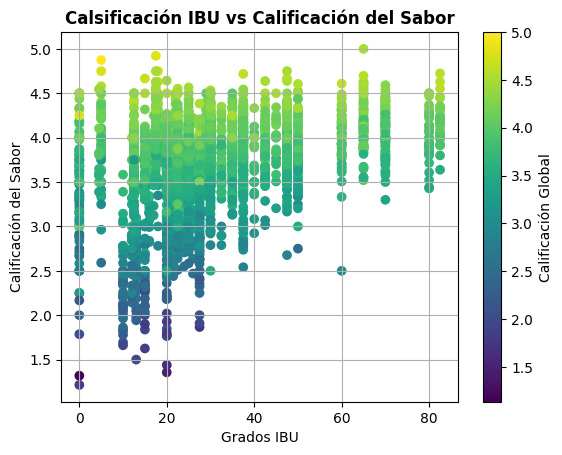

In [19]:
# Graficamos la columna IBU Promedio vs la columna review_taste, donde el color de cada punto vendrá dado por la columna
# review overall.
IBU2,ax = plt.subplots()

# Nombramos al gráfico para posteriormente poder crear la escala de color.
IBUsc = ax.scatter(wrk_df['IBU_Promedio'], wrk_df['review_taste'], c = wrk_df['review_overall'])
ax.set_xlabel(xlabel = 'Grados IBU')
ax.set_ylabel(ylabel = 'Calificación del Sabor')
ax.set_title(label = 'Calsificación IBU vs Calificación del Sabor')
ax.grid(visible = True)

# Creamos la escala de color de acuerdo a la variable review_overall.
cbar = IBU2.colorbar(IBUsc)
cbar.set_label('Calificación Global')

El gráfico anterior muestra nuevamente lo que ya pudimos observar en el mapa de calor de la correlación entre variables: la variable de calificación de sabor y calificación general tienen una alta correlación.

Por otro lado, podemos ver también que a mayor graduación IBU no hay calificaciones reprobatorias (menos de 2.5) para la cerveza en cuestión.

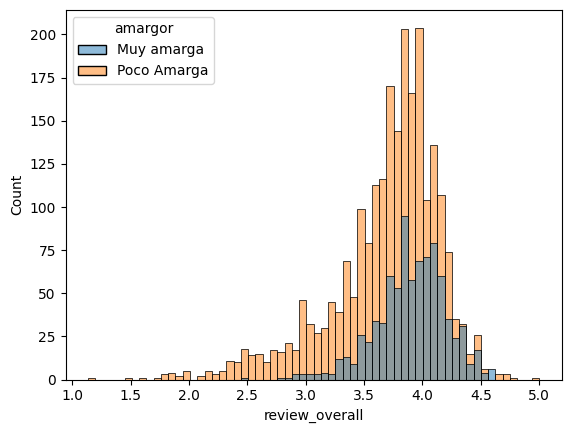

In [20]:
# Graficamos IBU Promedio contra Calificación Global con el distinctivo de la columna amaragor:
cal_amargor = sns.histplot(data = wrk_df, x = 'review_overall', hue = 'amargor', legend = 'brief')

Comprobamos lo anterior con un mejor gráfico.

De nuestra matriz de correlación, podemos obtener información adicional relativa al amargor y los IBUs de cada cerveza que resulta interesante:

In [21]:
# Revisamos la correlación con todas las variables:
corr_IBU_aux = {}

for row in matriz_corr:
    corr_IBU_aux[row] = matriz_corr[row]['IBU_Promedio']

corr_IBU_ord = sorted(corr_IBU_aux.items(), key=lambda x:x[1], reverse=True)
corr_IBU = dict(corr_IBU_ord)

for entrada in corr_IBU:
    if entrada != 'IBU_Promedio':
       print(f"{entrada} = {corr_IBU[entrada]:.2f}")

Max IBU = 0.98
Min IBU = 0.94
Bitter = 0.52
ABV = 0.49
review_appearance = 0.39
Hoppy = 0.38
Alcohol = 0.38
review_aroma = 0.37
review_palate = 0.37
review_taste = 0.36
Body = 0.33
Malty = 0.30
review_overall = 0.29
Sweet = 0.27
number_of_reviews = 0.23
Fruits = 0.14
Spices = 0.01
Sour = -0.06
Salty = -0.08
Astringency = -0.11


In [22]:
# Calculamos la correlación con las variables más relacionadas por concepto:
corr_ibu_hoppy = wrk_df['IBU_Promedio'].corr(wrk_df['Hoppy'])
corr_ibu_bitter = wrk_df['IBU_Promedio'].corr(wrk_df['Bitter'])
corr_bitter_hoppy = wrk_df['Bitter'].corr(wrk_df['Hoppy'])

print(f"La correlación entre la graduación IBU y la sensación de lúpulo reportada por los encuestados es de: {corr_ibu_hoppy * 100 : .2f}%.")
print(f"La correlación entre la graduación IBU y la sensación de amargor reportada por los encuestados es de: {corr_ibu_bitter * 100 : .2f}%.")
print(f"La correlación entre la sensación de amargor y la sensación de lúpulo reportada por los encuestados es de: {corr_bitter_hoppy * 100 : .2f}%.")

La correlación entre la graduación IBU y la sensación de lúpulo reportada por los encuestados es de:  38.24%.
La correlación entre la graduación IBU y la sensación de amargor reportada por los encuestados es de:  51.98%.
La correlación entre la sensación de amargor y la sensación de lúpulo reportada por los encuestados es de:  71.29%.


Tenemos una buena correlación entre la sensación de amargor y la de lúpulo, lo cual es lógico, pues el lúpulo otorga los sabores amargos a la cerveza. Lo interesante es la baja correlacion entre estas variables subjetivas con el valor objetivo de amargor que son los IBUs.

### 7.2 Exploración de las variables de alcohol:

La otra variable a la que le otorgamos especial interés en nuestras hipótesis es la de los grados de alcohol.

La elección de investigar más sobre los grados IBU y los grados ABV no es casual, esto se debe a que estos son valores objetivos medibles que la cervecera ha reportado y que, sin embargo, pueden repercutir en las observaciones subjetivas realizadas por los consumidores.

/tmp/ipykernel_1503/1288230904.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ABV_Prom_Est.index, fontsize = 8, rotation = 90)


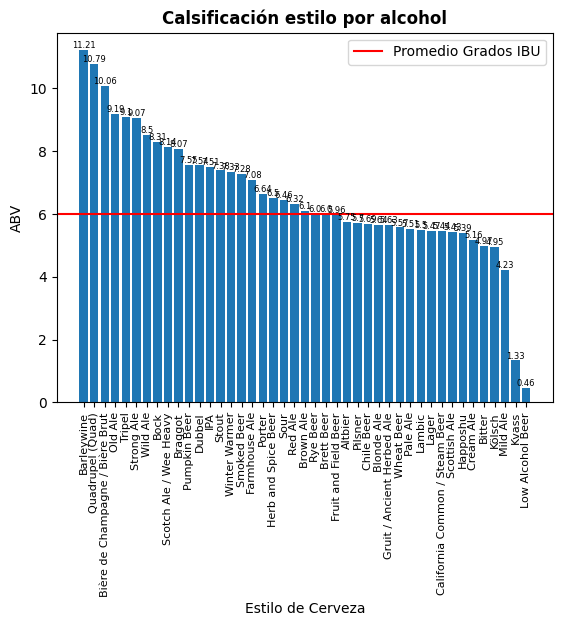

In [23]:
# Se hace un gráfico de barras:
# Calculamos el valor promedio de IBU por estilo de cerveza y lo ordenamos de manera descendente:
ABV_Prom_Est = wrk_df.groupby('Style')['ABV'].mean()
ABV_Prom_Est = ABV_Prom_Est.sort_values(ascending=False)

# Creamos la figura:
ABV1, ax = plt.subplots()

# Graficamos las barras:
barras = ax.bar(ABV_Prom_Est.index, ABV_Prom_Est.values)

# Agregamos el valor a cada barra:
for barra in barras:
    height = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, height,
            round(height, 2), ha='center', va='bottom', fontsize=6)

# Agregamos la línea de Promedio de grados IBU:
ax.axhline(6, color='red', label='Promedio Grados IBU')

# Identiicamos el eje X:
ax.set_xlabel('Estilo de Cerveza')

# Modificamos las etiquetas del eje X:
ax.set_xticklabels(ABV_Prom_Est.index, fontsize = 8, rotation = 90)

# Identiicamos el eje Y:
ax.set_ylabel('ABV')

# Ponemos el título:
ax.set_title('Calsificación estilo por alcohol')

# Agregamos la leyenda:
ax.legend()

# Se muestra el gráfico:
plt.show()

In [24]:
# Guardamos Top 5 y Bottom 5 con más alcohol en listas:
top5_ABV = ['Barleywine', 'Quadrupel (Quad)', 'Bière de Champagne / Bière Brut', 'Old Ale', 'Tripel']
bot5_ABV= ['Low Alcohol Beer', 'Kvass', 'Mild Ale', 'Kölsch', 'Bitter']

Vemos que las cervezas con más alcohol son:
1. Barleywine: 11.21°.
2. Quadrupel: 10.79°.
3. Bière Brut: 10.06°.
4. Old Ale: 9.19°.
5. Tripel: 9.10°.

Vemos que las cervezas con menos alcohol son:
1. Low Alcohol Beer: 0.46°
2. Kvass: 1.33°
3. Mild Ale: 4.23°
4. Kölsch: 4.95°
5. Bitter: 4.97°

Vemos que hay más variedades con una cantidad de alcohol más elevada que los 6°, aunque, desde nuestro análisis exploratorio ya habíamos visto que la cantidad de cervezas con más o menos de 6° de alcohol es practicamente la misma.

In [25]:
# Observaciones adicionales.
cerv_menor_6ABV = len(wrk_df.loc[(wrk_df.ABV < 6),"IBU_Promedio"])

print(f"Se presentan {cant_cerv_calif} cervezas en total, de las cuales, {cerv_menor_6ABV} tienen menos de 6° de alcohol.")

Se presentan 3197 cervezas en total, de las cuales, 1596 tienen menos de 6° de alcohol.


Buscamos ahora relación con nuestra variable de calificación global y la del aroma:

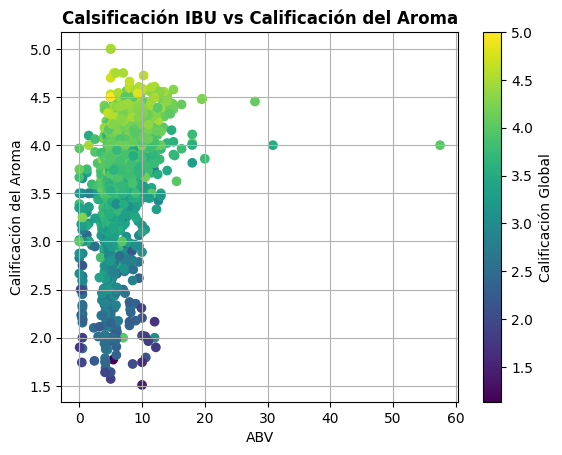

In [26]:
# Graficamos la columna IBU Promedio vs la columna review_taste, donde el color de cada punto vendrá dado por la columna
# review overall.
ABV2,ax = plt.subplots()

# Nombramos al gráfico para posteriormente poder crear la escala de color.
ABVsc = ax.scatter(wrk_df['ABV'], wrk_df['review_aroma'], c = wrk_df['review_overall'])
ax.set_xlabel(xlabel = 'ABV')
ax.set_ylabel(ylabel = 'Calificación del Aroma')
ax.set_title(label = 'Calsificación IBU vs Calificación del Aroma')
ax.grid(visible = True)

# Creamos la escala de color de acuerdo a la variable review_overall.
cbar = ABV2.colorbar(ABVsc)
cbar.set_label('Calificación Global')

La gráfica anterior presenta una deformación importante debido a los outliers, se vuelve a graficar omitiéndo estos valores.

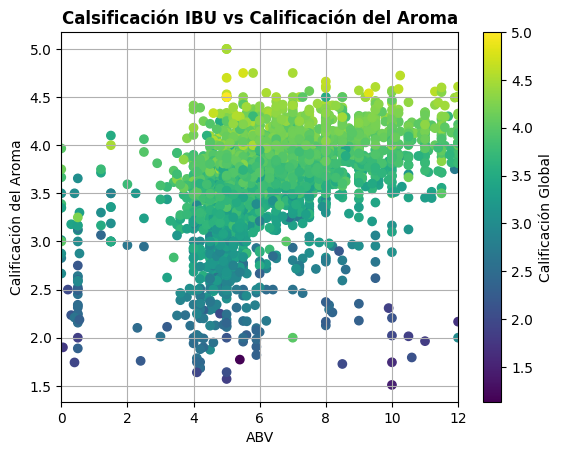

In [27]:
# Establecemos límites para x:
x_min, x_max = 0, 12

# Presentamos el gráfico:
ABV3,ax = plt.subplots()

# Nombramos al gráfico para posteriormente poder crear la escala de color.
ABVsc2 = ax.scatter(wrk_df['ABV'], wrk_df['review_aroma'], c = wrk_df['review_overall'])
ax.set_xlabel(xlabel = 'ABV')
ax.set_ylabel(ylabel = 'Calificación del Aroma')
ax.set_title(label = 'Calsificación IBU vs Calificación del Aroma')
ax.grid(visible = True)

# Creamos la escala de color de acuerdo a la variable review_overall.
cbar = ABV3.colorbar(ABVsc2)
cbar.set_label('Calificación Global')

# Se marcan los límites:
plt.xlim(x_min, x_max)

# Mostramos el resultado:
plt.show()

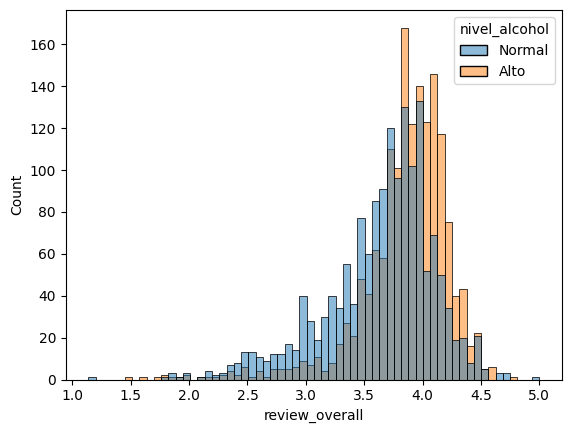

In [28]:
# Graficamos ABV contra Calificación Global con el distinctivo de la columna nivel_alcohol:
cal_alcohol = sns.histplot(data = wrk_df, x = 'review_overall', hue = 'nivel_alcohol', legend = 'brief')

In [29]:
# Revisamos la correlación con todas las variables:
corr_ABV_aux = {}

for row in matriz_corr:
    corr_ABV_aux[row] = matriz_corr[row]['ABV']

corr_ABV_ord = sorted(corr_ABV_aux.items(), key=lambda x:x[1], reverse=True)
corr_ABV = dict(corr_ABV_ord)

for entrada in corr_ABV:
    if entrada != 'ABV':
       print(f"{entrada} = {corr_ABV[entrada]:.2f}")

Alcohol = 0.65
Max IBU = 0.50
IBU_Promedio = 0.49
Sweet = 0.46
Min IBU = 0.43
review_aroma = 0.42
review_palate = 0.39
review_taste = 0.38
review_appearance = 0.35
Fruits = 0.29
review_overall = 0.25
Body = 0.24
Spices = 0.19
Malty = 0.16
number_of_reviews = 0.14
Sour = 0.10
Bitter = 0.07
Hoppy = -0.05
Salty = -0.12
Astringency = -0.17


In [30]:
# Calculamos la correlación con las variables más relacionadas por concepto:
corr_abv_alc = wrk_df['ABV'].corr(wrk_df['Alcohol'])
corr_abv_aroma = wrk_df['ABV'].corr(wrk_df['review_aroma'])

print(f"La correlación entre los grados de alcohol y la sensación de alcohol reportada por los encuestados es de: {corr_abv_alc * 100 : .2f}%.")
print(f"La correlación entre los grados de alcohol y la calificación dada al aroma por los encuestados es de: {corr_abv_aroma * 100 : .2f}%.")


La correlación entre los grados de alcohol y la sensación de alcohol reportada por los encuestados es de:  65.49%.
La correlación entre los grados de alcohol y la calificación dada al aroma por los encuestados es de:  41.62%.


Interesante que es tan baja la correlación entre la sensación de alcohol percibida en la cerveza y la cantidad real de alcohol que esta tiene.

### 7.3 Exploración de las variables de calificación:

Es momento de explorar nuestra último conjunto de variables, de nuestra matriz de correlación ya sabemos que todas las variables relacionadas con la calificación guardan una fuerte correlación, por eso, nos enfocamos en la calificación global.

Comenzaremos analizando como han sido evaluadas las cervezas más populares, las menos populares, las que tienen más IBUs, menos IBUs y cero IBUs y las cervezas con más y menos alcohol.

/tmp/ipykernel_1503/1409326833.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cal_Prom_Est.index, fontsize = 8, rotation = 90)


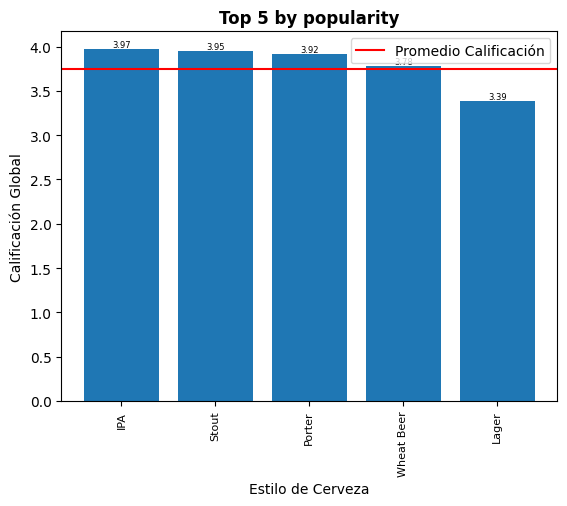

/tmp/ipykernel_1503/1409326833.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cal_Prom_Est.index, fontsize = 8, rotation = 90)


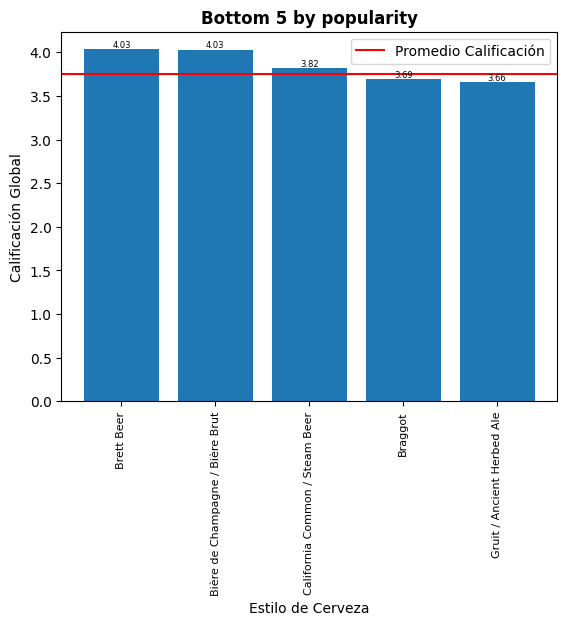

/tmp/ipykernel_1503/1409326833.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cal_Prom_Est.index, fontsize = 8, rotation = 90)


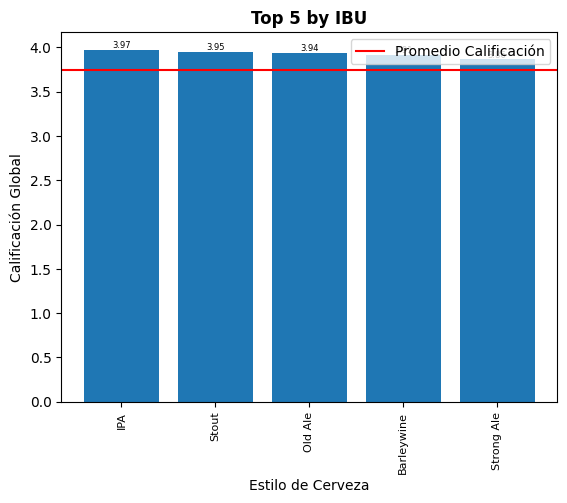

/tmp/ipykernel_1503/1409326833.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cal_Prom_Est.index, fontsize = 8, rotation = 90)


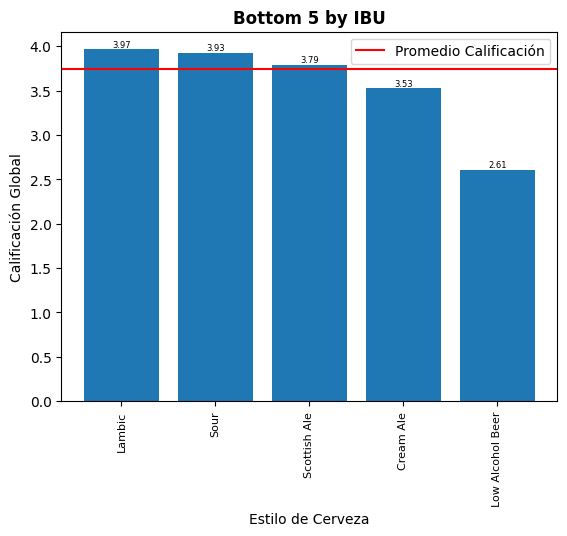

/tmp/ipykernel_1503/1409326833.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cal_Prom_Est.index, fontsize = 8, rotation = 90)


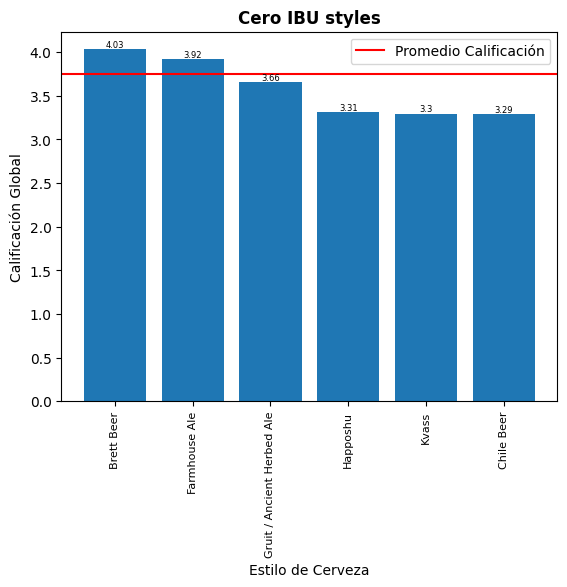

/tmp/ipykernel_1503/1409326833.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cal_Prom_Est.index, fontsize = 8, rotation = 90)


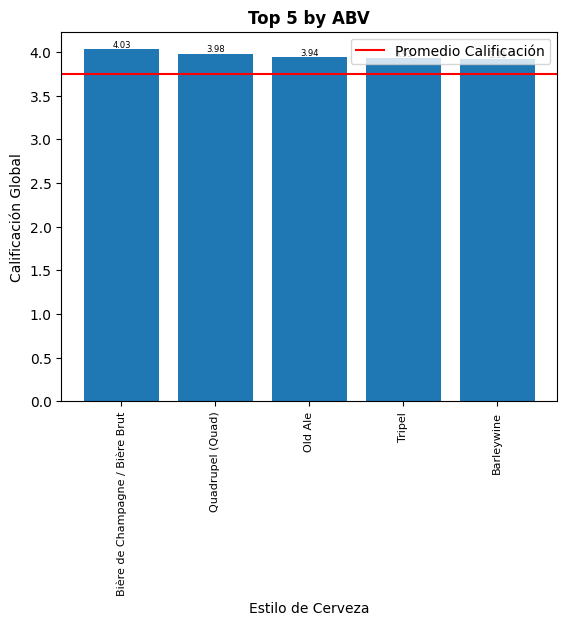

/tmp/ipykernel_1503/1409326833.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cal_Prom_Est.index, fontsize = 8, rotation = 90)


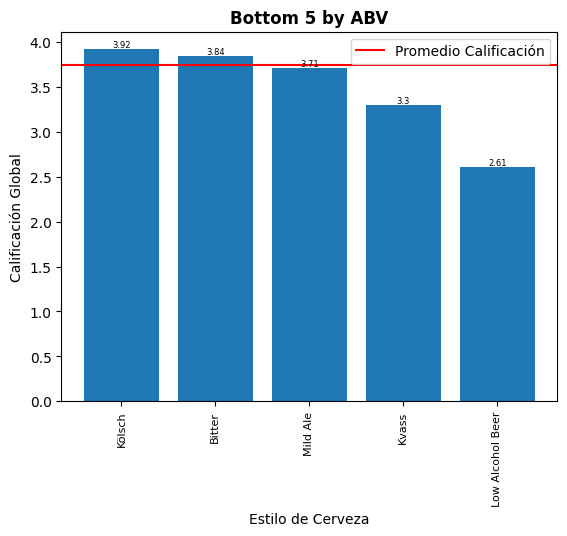

In [60]:
# Obtenemos la calificación promedio:
cal_glob_prom = wrk_df.review_overall.mean()

# Se hacen gráficos de barras:
subgrupos_graf = [top5_pop, bot5_pop, top5_IBU, bot5_IBU, var_cero_IBU, top5_ABV, bot5_ABV]
nombre_subgrupos = ['Top 5 by popularity', 'Bottom 5 by popularity', 'Top 5 by IBU', 'Bottom 5 by IBU', 'Cero IBU styles', 'Top 5 by ABV', 'Bottom 5 by ABV']

for i, elem in enumerate(subgrupos_graf):
    # Calculamos la calificación promedio de los grupos de estilos:
    cal_graf_df = wrk_df[wrk_df['Style'].isin(elem)]
    cal_Prom_Est = cal_graf_df.groupby('Style')['review_overall'].mean()
    cal_Prom_Est = cal_Prom_Est.sort_values(ascending=False)

    # Creamos la figura:
    cal1, ax = plt.subplots()

    # Graficamos las barras:
    barras = ax.bar(cal_Prom_Est.index, cal_Prom_Est.values)

    # Agregamos el valor a cada barra:
    for barra in barras:
        height = barra.get_height()
        ax.text(barra.get_x() + barra.get_width() / 2, height,
                round(height, 2), ha='center', va='bottom', fontsize=6)

    # Agregamos la línea de Promedio de grados IBU:
    ax.axhline(cal_glob_prom, color='red', label='Promedio Calificación')

    # Identiicamos el eje X:
    ax.set_xlabel('Estilo de Cerveza')

    # Modificamos las etiquetas del eje X:
    ax.set_xticklabels(cal_Prom_Est.index, fontsize = 8, rotation = 90)

    # Identiicamos el eje Y:
    ax.set_ylabel('Calificación Global')

    # Ponemos el título:
    ax.set_title(nombre_subgrupos[i])

    # Agregamos la leyenda:
    ax.legend()

    # Se muestra el gráfico:
    plt.show()

## 8. Modelo de clasificación:

En línea con nuestros objetivos, en esta sección se construirá un modelo de clasificación que nos permita identificar la variedad o estilo de una cerveza dadas ciertas características que esta tenga basándonos en la base de datos.

Se realizarán un proceso de selección de atributos para identificar cuales de las variables tienen mayor peso en la determinación del estilo de cerveza, luego se crearán y probarán 3 modelos distintos para poder comparar sus métricas.

### 8.1 Selección de atributos:

Basándonos en la exploración que ya hemos hecho de la información, el primer paso a seguir para seleccionar los atributos que se tomarán en cuenta para alimentar al modelo de ML será eliminar variables redundantes o con un alto nivel de correlación.

Variables redundantes que se eliminarán:
* amargor: se elimina puesto que es mejor tener el valor numérico de IBUs y estas son dos variables redundantes.
* IBU min y max: nos quedamos con el valor promedio de IBU.
* nivel_alcohol: mismo caso que con amargor, es sustituida por la variable ABV ya existente.
* Secondary Style: no nos aporta información relevante para nuestro modelo y con la información que tenemos, puede provocar un overfitting facilmente.

Se eliminan también:
* Name / Full_name.
* Brewery.
* Description.
* number_of reviews.

Puesto que estas variables de nuevo pudieran causar un overfitting y no guardan relació con el objetivo.

In [32]:
# Se obtienen las variables con un valor de correlación mayor a 0.75:
var_corr_alta = {}

for row in matriz_corr:
    for col in matriz_corr.columns:
        if row == col:
            pass
        elif matriz_corr[row][col] >=0.75:
            entrada = row + "-" + col
            var_corr_alta[entrada] = (matriz_corr[row][col])

var_corr_alta

{'Min IBU-Max IBU': 0.854248060050787,
 'Min IBU-IBU_Promedio': 0.9430886145071966,
 'Max IBU-Min IBU': 0.854248060050787,
 'Max IBU-IBU_Promedio': 0.978508521445928,
 'Body-Malty': 0.7542281845837208,
 'Sour-Fruits': 0.7858825416364527,
 'Fruits-Sour': 0.7858825416364527,
 'Malty-Body': 0.7542281845837208,
 'review_aroma-review_appearance': 0.8556294488178621,
 'review_aroma-review_palate': 0.9074330781952713,
 'review_aroma-review_taste': 0.9366701917449577,
 'review_aroma-review_overall': 0.8705038908535996,
 'review_appearance-review_aroma': 0.8556294488178621,
 'review_appearance-review_palate': 0.8699784091128802,
 'review_appearance-review_taste': 0.8506927737807455,
 'review_appearance-review_overall': 0.8134435768523898,
 'review_palate-review_aroma': 0.9074330781952713,
 'review_palate-review_appearance': 0.8699784091128802,
 'review_palate-review_taste': 0.9465200003969029,
 'review_palate-review_overall': 0.9181541750546925,
 'review_taste-review_aroma': 0.9366701917449577,

Además de las variables de Max y Min IBU que ya habíamos establecido se van a retirar por ser redundantes y que se ha confirmado su fuerte correlación con la variable IBU Promedio, como era de supornerse al ser esta una columna calculada; también encontramos que las variables:

 * 'Body-Malty': 0.7542281845837208,
 * 'Sour-Fruits': 0.7858825416364527,

Con fuertes correlaciones, por lo cual se opta por descartar las variables "Body" y "Sour" al considerarse palabras menos relacionadas con una cerveza en comparación con sus contrapartes "Malty" y "Fruits", respectivamente.

Como podemos ver del diccionario anterior, todas las variables de review guardan una fuerte correlación una con otra, por lo que solo se usará la variable de review_overall que ya es una variable que agrupa a las demás.

In [33]:
# Creamos nuestras variables X e Y para el modelo con los atributos restantes.
atributos_1 = ['ABV', 'Astringency', 'Alcohol', 'Bitter', 'Sweet', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty','review_overall', 'IBU_Promedio']
x_clasif_1 = wrk_df[atributos_1].copy()
y_clasif_1 = wrk_df['Style'].copy()

Otra forma de obtener los atributos o variables más importantes es aplicando algunos métodos de scikit-learn.

In [34]:
# Importamos las funciones a usar:
from sklearn.feature_selection import SelectKBest, f_classif

# Elegimos el número de atributos que buscamos, en este caso nos iremos con
# 6, que son la mitad de los que ya tenemos previamente filtrados.
k = 6
selector = SelectKBest(f_classif, k=k)
selector.fit(x_clasif_1, y_clasif_1)
atr_selec_1 = x_clasif_1.columns[selector.get_support()]

print(atr_selec_1)

x_clasif_2 = x_clasif_1[atr_selec_1].copy()

Index(['Bitter', 'Fruits', 'Hoppy', 'Spices', 'Malty', 'IBU_Promedio'], dtype='object')


### 8.2 Creación y calibración del modelo de ML:

In [35]:
# Se importan las funciones para nuestro modelo:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Creamos los subconjuntos de datos para entrenar y probar los modelos:
# Se crea una división para cada subconjunto de atributos.
x_clasif_train_1, x_clasif_test_1, y_clasif_train_1, y_clasif_test_1 = train_test_split(x_clasif_1, y_clasif_1, test_size=0.2, random_state=42)
x_clasif_train_2, x_clasif_test_2, y_clasif_train_2, y_clasif_test_2 = train_test_split(x_clasif_2, y_clasif_1, test_size=0.2, random_state=42)

# Creamos/instanciamos los modelos:
rfc_1 = RandomForestClassifier()
gbc_1 = GradientBoostingClassifier()
svm_1 = SVC()
rfc_2 = RandomForestClassifier()
gbc_2 = GradientBoostingClassifier()
svm_2 = SVC()

# Entrenamos los modelos:
rfc_1.fit(x_clasif_train_1, y_clasif_train_1)
gbc_1.fit(x_clasif_train_1, y_clasif_train_1)
svm_1.fit(x_clasif_train_1, y_clasif_train_1)
rfc_2.fit(x_clasif_train_2, y_clasif_train_2)
gbc_2.fit(x_clasif_train_2, y_clasif_train_2)
svm_2.fit(x_clasif_train_2, y_clasif_train_2)

SVC()

### 8.3 Prueba del modelo:

In [36]:
# Hacemos las predicciones:
rfc_1_pred = rfc_1.predict(x_clasif_test_1)
gbc_1_pred = gbc_1.predict(x_clasif_test_1)
svm_1_pred = svm_1.predict(x_clasif_test_1)
rfc_2_pred = rfc_2.predict(x_clasif_test_2)
gbc_2_pred = gbc_2.predict(x_clasif_test_2)
svm_2_pred = svm_2.predict(x_clasif_test_2)

### 8.4 Métricas del modelo:

In [37]:
# Creamos un diccionario para almacenar las métricas de cada subconjunto:
metricas_x_clasif_1 = {}
metricas_x_clasif_2 = {}

# Obtenemos las métricas:
metricas_x_clasif_1['rfc_acc'] = accuracy_score(y_clasif_test_1, rfc_1_pred)
metricas_x_clasif_1['gbc_acc'] = accuracy_score(y_clasif_test_1, gbc_1_pred)
metricas_x_clasif_1['svm_acc'] = accuracy_score(y_clasif_test_1, svm_1_pred)
metricas_x_clasif_1['rfc_pres'] = precision_score(y_clasif_test_1, rfc_1_pred, average='macro')
metricas_x_clasif_1['gbc_pres'] = precision_score(y_clasif_test_1, gbc_1_pred, average='macro')
metricas_x_clasif_1['svm_pres'] = precision_score(y_clasif_test_1, svm_1_pred, average='macro')
metricas_x_clasif_1['rfc_rec'] = recall_score(y_clasif_test_1, rfc_1_pred, average='macro')
metricas_x_clasif_1['gbc_rec'] = recall_score(y_clasif_test_1, gbc_1_pred, average='macro')
metricas_x_clasif_1['svm_rec'] = recall_score(y_clasif_test_1, svm_1_pred, average='macro')
metricas_x_clasif_1['rfc_f1'] = f1_score(y_clasif_test_1, rfc_1_pred, average='macro')
metricas_x_clasif_1['gbc_f1'] = f1_score(y_clasif_test_1, gbc_1_pred, average='macro')
metricas_x_clasif_1['svm_f1'] = f1_score(y_clasif_test_1, svm_1_pred, average='macro')

metricas_x_clasif_2['rfc_acc'] = accuracy_score(y_clasif_test_2, rfc_2_pred)
metricas_x_clasif_2['gbc_acc'] = accuracy_score(y_clasif_test_2, gbc_2_pred)
metricas_x_clasif_2['svm_acc'] = accuracy_score(y_clasif_test_2, svm_2_pred)
metricas_x_clasif_2['rfc_pres'] = precision_score(y_clasif_test_2, rfc_2_pred, average='macro')
metricas_x_clasif_2['gbc_pres'] = precision_score(y_clasif_test_2, gbc_2_pred, average='macro')
metricas_x_clasif_2['svm_pres'] = precision_score(y_clasif_test_2, svm_2_pred, average='macro')
metricas_x_clasif_2['rfc_rec'] = recall_score(y_clasif_test_2, rfc_2_pred, average='macro')
metricas_x_clasif_2['gbc_rec'] = recall_score(y_clasif_test_2, gbc_2_pred, average='macro')
metricas_x_clasif_2['svm_rec'] = recall_score(y_clasif_test_2, svm_2_pred, average='macro')
metricas_x_clasif_2['rfc_f1'] = f1_score(y_clasif_test_2, rfc_2_pred, average='macro')
metricas_x_clasif_2['gbc_f1'] = f1_score(y_clasif_test_2, gbc_2_pred, average='macro')
metricas_x_clasif_2['svm_f1'] = f1_score(y_clasif_test_2, svm_2_pred, average='macro')

# Imprimos las métricas:
i = 0

print("Subconjunto 1:")
for elem in metricas_x_clasif_1:
    print(f"{elem} = {metricas_x_clasif_1[elem]:.2f} ", end =" ")
    i += 1

    if i == 3:
        i = 0
        print("\n")

print("\n")

print("Subconjunto 2:")
for elem in metricas_x_clasif_2:
    print(f"{elem} = {metricas_x_clasif_2[elem]:.2f} ", end =" ")
    i += 1

    if i == 3:
        i = 0
        print("\n")

Subconjunto 1:
rfc_acc = 0.73  gbc_acc = 0.79  svm_acc = 0.53  

rfc_pres = 0.69  gbc_pres = 0.80  svm_pres = 0.39  

rfc_rec = 0.64  gbc_rec = 0.72  svm_rec = 0.31  

rfc_f1 = 0.64  gbc_f1 = 0.73  svm_f1 = 0.31  



Subconjunto 2:
rfc_acc = 0.70  gbc_acc = 0.73  svm_acc = 0.51  

rfc_pres = 0.70  gbc_pres = 0.65  svm_pres = 0.34  

rfc_rec = 0.62  gbc_rec = 0.64  svm_rec = 0.29  

rfc_f1 = 0.62  gbc_f1 = 0.63  svm_f1 = 0.28  



/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/codespace/.local/lib/python3.10/site-packages/sklearn/metrics

## 9. Modelo de regresión:

En este apartado crearemos el modelo de regresión que nos permita predecir la calificación global que obtendría una cerveza dadas ciertas características que esta tenga.

Por cuestiones de objetividad, se dejarán a un lado todas las variables cualitativas como son: Name, Brewery, Full_name, Description, amargor, nivel_alcohol, Style y Secondary_style.

Así mismo, partimos del mismo conjunto de datos X que establecimos en la sección anterior, exceptuando la columna reviews_overall.

In [38]:
# Creamos nuestras variables X e Y para el modelo con los atributos restantes.
atributos_2 = ['ABV', 'Astringency', 'Alcohol', 'Bitter', 'Sweet', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty', 'IBU_Promedio']
x_reg_1 = wrk_df[atributos_2].copy()
y_reg_1 = wrk_df['review_overall'].copy()

### 9.1 Selección de atributos (Feature Selection):

Ya tenemos nuestra matriz de correlación que ha sido aplicada mediante el método de Pearson, recomendado para elegir los atributos numéricos que más impacto tienen cuando la variable objetivo también es numérica. Así, obtendremos las 6 variables con mayor correlación respecto a la variable objetivo y las usaremos para nuestro segundo subconjunto, similar a lo hecho para el modelo de clasificación.

In [39]:
# Imprimimos los valores de correlación:
print('Correlación con la variable "review_overall":')
for col in atributos_2:
    print(f"{col} = {matriz_corr['review_overall'][col] : .2f}")

Correlación con la variable "review_overall":
ABV =  0.25
Astringency =  0.16
Alcohol =  0.07
Bitter =  0.26
Sweet =  0.21
Salty = -0.01
Fruits =  0.26
Hoppy =  0.18
Spices =  0.14
Malty =  0.21
IBU_Promedio =  0.29


In [40]:
# Nos quedamos solo con las 6 variables con mayor correlación:
atributos_3 = ['ABV', 'Bitter', 'Sweet', 'Fruits', 'Malty', 'IBU_Promedio']
x_reg_2 = wrk_df[atributos_3].copy()

### 9.2 Creación y calibración del modelo de ML:

In [41]:
# Se importan las funciones para nuestro modelo:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Creamos los subconjuntos de datos para entrenar y probar los modelos:
# Se crea una división para cada subconjunto de atributos.
x_reg_train_1, x_reg_test_1, y_reg_train_1, y_reg_test_1 = train_test_split(x_reg_1, y_reg_1, test_size=0.2, random_state=42)
x_reg_train_2, x_reg_test_2, y_reg_train_2, y_reg_test_2 = train_test_split(x_reg_2, y_reg_1, test_size=0.2, random_state=42)

# Creamos/instanciamos los modelos:
lrm_1 = LinearRegression()
lrm_2 = LinearRegression()
rfr_1 = RandomForestRegressor()
rfr_2 = RandomForestRegressor()
gbr_1 = GradientBoostingRegressor()
gbr_2 = GradientBoostingRegressor()

# Entrenamos los modelos:
rfr_1.fit(x_reg_train_1, y_reg_train_1)
gbr_1.fit(x_reg_train_1, y_reg_train_1)
lrm_1.fit(x_reg_train_1, y_reg_train_1)
rfr_2.fit(x_reg_train_2, y_reg_train_2)
gbr_2.fit(x_reg_train_2, y_reg_train_2)
lrm_2.fit(x_reg_train_2, y_reg_train_2)

LinearRegression()

### 9.3 Prueba del modelo:

In [42]:
# Hacemos las predicciones:
rfr_1_pred = rfr_1.predict(x_reg_test_1)
gbr_1_pred = gbr_1.predict(x_reg_test_1)
lrm_1_pred = lrm_1.predict(x_reg_test_1)
rfr_2_pred = rfr_2.predict(x_reg_test_2)
gbr_2_pred = gbr_2.predict(x_reg_test_2)
lrm_2_pred = lrm_2.predict(x_reg_test_2)

### 9.4 Métricas del modelo:

In [43]:
# Creamos un diccionario para almacenar las métricas de cada subconjunto:
metricas_x_reg_1 = {}
metricas_x_reg_2 = {}

# Obtenemos las métricas:
metricas_x_reg_1['rfr_mse'] = mean_squared_error(y_reg_test_1, rfr_1_pred)
metricas_x_reg_1['gbr_mse'] = mean_squared_error(y_reg_test_1, gbr_1_pred)
metricas_x_reg_1['lrm_mse'] = mean_squared_error(y_reg_test_1, lrm_1_pred)
metricas_x_reg_1['rfr_rmse'] = np.sqrt(metricas_x_reg_1['rfr_mse'])
metricas_x_reg_1['gbr_rmse'] = np.sqrt(metricas_x_reg_1['gbr_mse'])
metricas_x_reg_1['lrm_rmse'] = np.sqrt(metricas_x_reg_1['lrm_mse'])
metricas_x_reg_1['rfr_mae'] = mean_absolute_error(y_reg_test_1, rfr_1_pred)
metricas_x_reg_1['gbr_mae'] = mean_absolute_error(y_reg_test_1, gbr_1_pred)
metricas_x_reg_1['lrm_mae'] = mean_absolute_error(y_reg_test_1, lrm_1_pred)
metricas_x_reg_1['rfr_r2'] = r2_score(y_reg_test_1, rfr_1_pred)
metricas_x_reg_1['gbr_r2'] = r2_score(y_reg_test_1, gbr_1_pred)
metricas_x_reg_1['lrm_r2'] = r2_score(y_reg_test_1, lrm_1_pred)

metricas_x_reg_2['rfr_mse'] = mean_squared_error(y_reg_test_2, rfr_2_pred)
metricas_x_reg_2['gbr_mse'] = mean_squared_error(y_reg_test_2, gbr_2_pred)
metricas_x_reg_2['lrm_mse'] = mean_squared_error(y_reg_test_2, lrm_2_pred)
metricas_x_reg_2['rfr_rmse'] = np.sqrt(metricas_x_reg_2['rfr_mse'])
metricas_x_reg_2['gbr_rmse'] = np.sqrt(metricas_x_reg_2['gbr_mse'])
metricas_x_reg_2['lrm_rmse'] = np.sqrt(metricas_x_reg_2['lrm_mse'])
metricas_x_reg_2['rfr_mae'] = mean_absolute_error(y_reg_test_2, rfr_2_pred)
metricas_x_reg_2['gbr_mae'] = mean_absolute_error(y_reg_test_2, gbr_2_pred)
metricas_x_reg_2['lrm_mae'] = mean_absolute_error(y_reg_test_2, lrm_2_pred)
metricas_x_reg_2['rfr_r2'] = r2_score(y_reg_test_2, rfr_2_pred)
metricas_x_reg_2['gbr_r2'] = r2_score(y_reg_test_2, gbr_2_pred)
metricas_x_reg_2['lrm_r2'] = r2_score(y_reg_test_2, lrm_2_pred)

# Imprimos las métricas:
i = 0

print("Subconjunto 1:")
for elem in metricas_x_reg_1:
    print(f"{elem} = {metricas_x_reg_1[elem]:.2f} ", end =" ")
    i += 1

    if i == 3:
        i = 0
        print("\n")

print("\n")

print("Subconjunto 2:")
for elem in metricas_x_reg_2:
    print(f"{elem} = {metricas_x_reg_2[elem]:.2f} ", end =" ")
    i += 1

    if i == 3:
        i = 0
        print("\n")

Subconjunto 1:
rfr_mse = 0.10  gbr_mse = 0.11  lrm_mse = 0.14  

rfr_rmse = 0.32  gbr_rmse = 0.33  lrm_rmse = 0.38  

rfr_mae = 0.24  gbr_mae = 0.25  lrm_mae = 0.28  

rfr_r2 = 0.44  gbr_r2 = 0.42  lrm_r2 = 0.21  



Subconjunto 2:
rfr_mse = 0.13  gbr_mse = 0.12  lrm_mse = 0.15  

rfr_rmse = 0.35  gbr_rmse = 0.35  lrm_rmse = 0.39  

rfr_mae = 0.26  gbr_mae = 0.26  lrm_mae = 0.29  

rfr_r2 = 0.31  gbr_r2 = 0.32  lrm_r2 = 0.18  



## 10. Conclusiones:

### 10.1 Conclusiones sobre las hipótesis:

### 10.2 Conclusiones sobre los modelos de ML:

### 10.3 Pensamientos finales.